In [1]:
from pymongo import MongoClient
from bson.objectid import ObjectId
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-darkgrid')

In [3]:
client = MongoClient('192.168.178.25', 27017)
db = client.TFE
collection = db.results

# Analysis of results without SMOTE

In [4]:
results = pd.DataFrame(columns = ['model', 'max_features', 'type', 'recall', 'precision', 'f1'])
for result in collection.find({'experiment_id' : 12}, {'report' : 1, '_id' : 0, 'max_features' : 1, 'smote' : 1, 'downsampling' : 1}):
    for model in result['report']:
        results = results.append({'model' : model['model'], 'type' : 'fake', 'recall' : model['classification_report']['fake']['recall'], 'precision' : model['classification_report']['fake']['precision'], 'max_features' : result['max_features'], 'f1' : model['classification_report']['fake']['f1-score']}, ignore_index=True)
        results = results.append({'model' : model['model'], 'type' : 'reliable', 'recall' : model['classification_report']['reliable']['recall'], 'precision' : model['classification_report']['reliable']['precision'], 'max_features' : result['max_features'], 'f1' : model['classification_report']['reliable']['f1-score']}, ignore_index=True)

In [5]:
fp = open('tab.tex', 'w')
results.to_latex(fp)
fp.close()

In [6]:
#results['max_features'] = results['max_features'].apply(lambda x: math.log10(x))

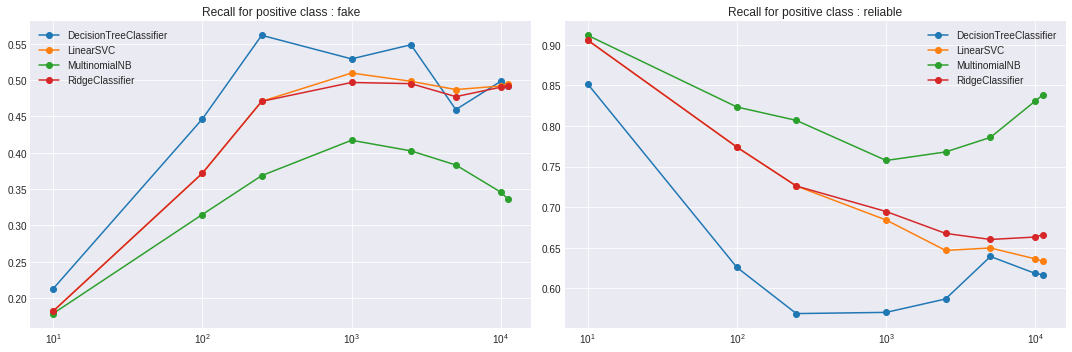

In [7]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
for key, grp in results[results['type'] == 'fake'].groupby(['model']):
    axes[0].set_xscale("log", nonposx='clip')
    axes[0].plot(grp['max_features'], grp['recall'], label=key, marker='o')
    axes[0].set_title('Recall for positive class : fake')
    #axes[0].xscale('log')
    axes[0].legend()

for key, grp in results[results['type'] == 'reliable'].groupby(['model']):
    axes[1].set_xscale("log", nonposx='clip')
    axes[1].plot(grp['max_features'], grp['recall'], label=key, marker='o')
    axes[1].set_title('Recall for positive class : reliable')
    #axes[1].xscale('log')
    axes[1].legend()
plt.tight_layout()
plt.savefig('output/liar-liar_recall_ML.pdf')

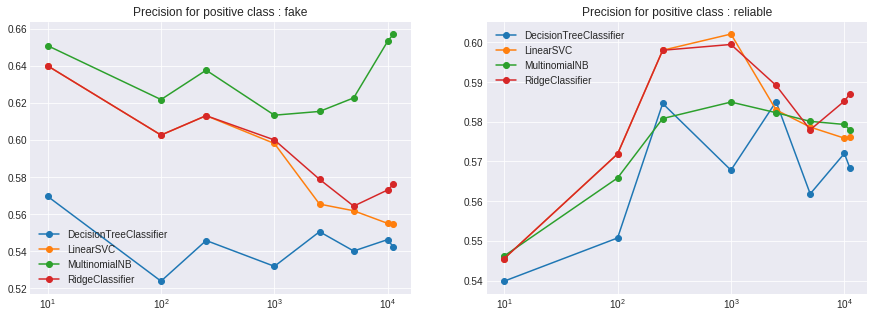

In [8]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
for key, grp in results[results['type'] == 'fake'].groupby(['model']):
    axes[0].plot(grp['max_features'], grp['precision'], label=key, marker='o')
    axes[0].set_title('Precision for positive class : fake')
    axes[0].set_xscale('log')
    axes[0].legend()

for key, grp in results[results['type'] == 'reliable'].groupby(['model']):
    axes[1].plot(grp['max_features'], grp['precision'], label=key, marker='o')
    axes[1].set_title('Precision for positive class : reliable')
    axes[1].set_xscale('log')
    axes[1].legend()
plt.savefig('output/liar-liar_precision_ML.pdf')

In [9]:
results = pd.DataFrame(columns = ['model', 'max_features','recall', 'precision', 'f1'])
for result in collection.find({'experiment_id' : 12}, {'report' : 1, '_id' : 0, 'max_features' : 1, 'smote' : 1, 'downsampling' : 1}):
    for model in result['report']:
        results = results.append({'model' : model['model'], 'recall' : model['classification_report']['weighted avg']['recall'], 'precision' : model['classification_report']['weighted avg']['precision'], 'max_features' : result['max_features'], 'f1' : model['classification_report']['weighted avg']['f1-score']}, ignore_index=True)

In [10]:
fp = open('tab.tex', 'w')
results.to_latex(fp)
fp.close()

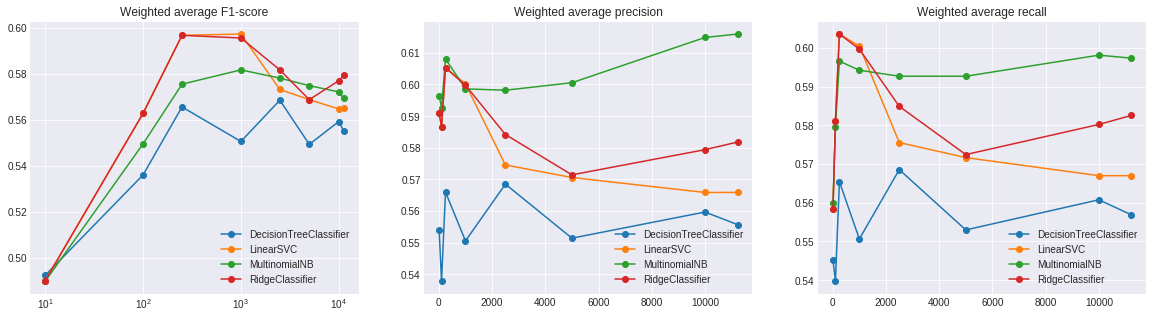

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(20,5))
for key, grp in results.groupby(['model']):
    axes[0].plot(grp['max_features'], grp['f1'], label=key, marker='o')
    axes[0].set_title('Weighted average F1-score')
    axes[0].set_xscale('log')
    axes[0].legend()
    axes[1].plot(grp['max_features'], grp['precision'], label=key, marker='o')
    axes[1].set_title('Weighted average precision')
    axes[0].set_xscale('log')
    axes[1].legend()
    axes[2].plot(grp['max_features'], grp['recall'], label=key, marker='o')
    axes[2].set_title('Weighted average recall')
    axes[0].set_xscale('log')
    axes[2].legend()
plt.savefig('output/liar-liar_f1_ML.pdf')